In [1]:
# Fit Lehigh data to model
# With optimal queue compare Lehigh data to 5000 simmed 

Imports

In [6]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from scipy.stats import binom, poisson
import matplotlib.pyplot as plt
import statistics as stat

For LU:

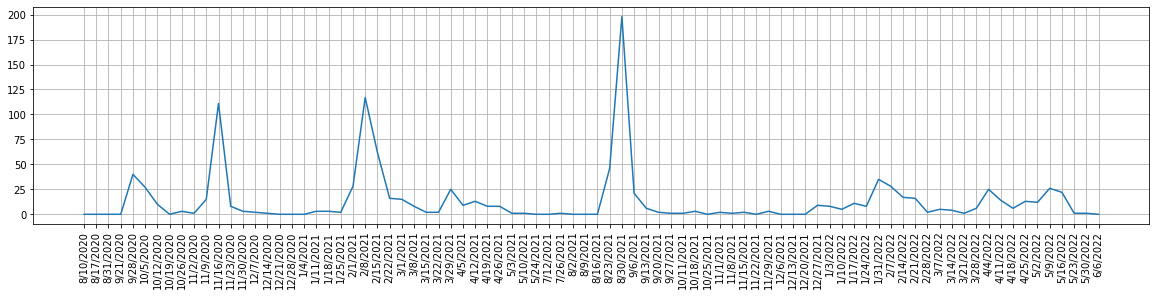

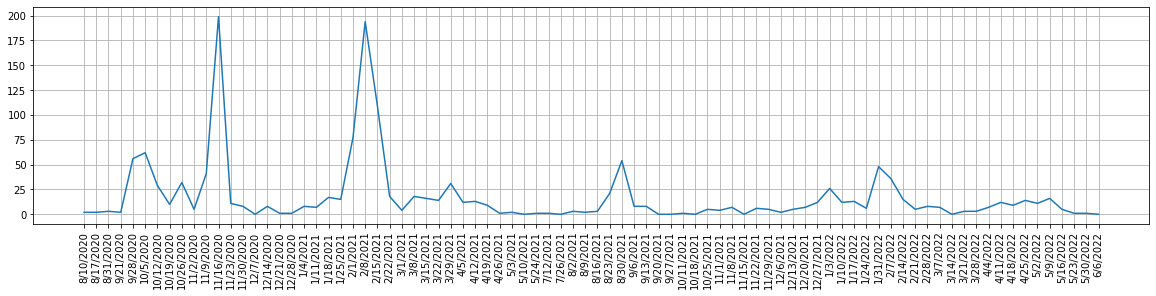

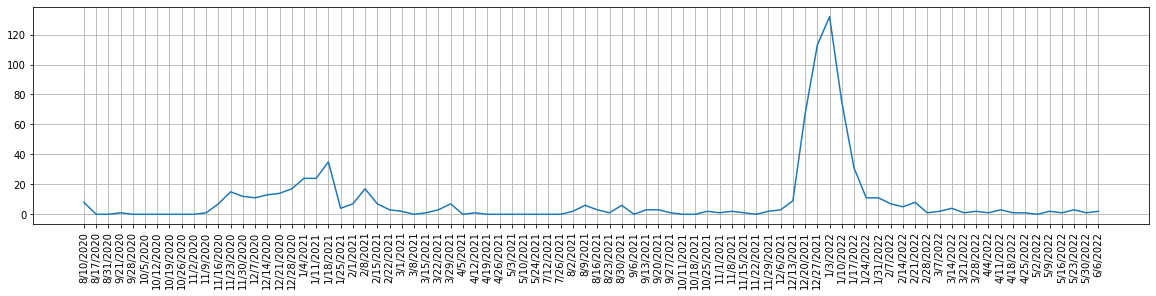

In [219]:
df = pd.read_csv("../Data/dataCSV.csv")
dates = df["Week_Reporting_Date"]
OnCamp = df.fillna(0)["On Campus Cases"]
OffCamp = df.fillna(0)["Off Campus Cases"]
Home = df.fillna(0)["Home Cases"]
def graph(data, dates):
    for ele in data:
        f = plt.figure()
        f.set_figwidth(20)
        plt.plot(dates, ele)
        plt.xticks(rotation = 90)
        plt.grid()
        plt.show()

graph([OnCamp, OffCamp, Home], dates)

#Home data shows no correlation with the on and off campus data so it will not be included

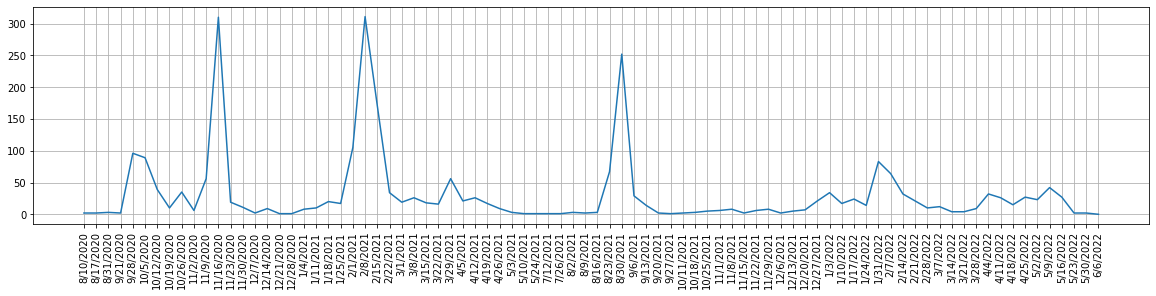

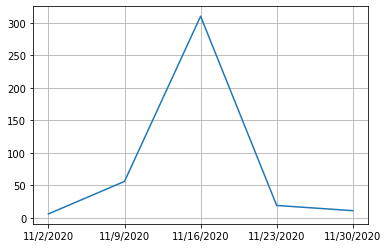

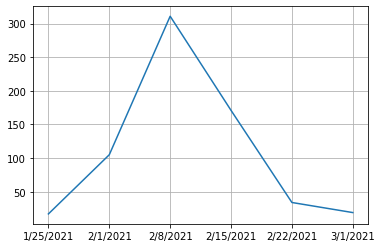

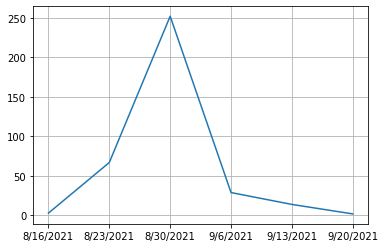

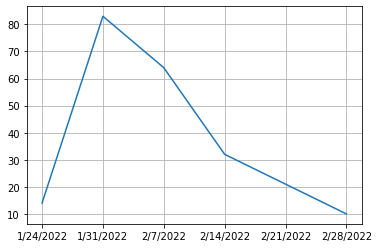

In [220]:
def graphRange(range, data, dates):
    for ele in range:
        date = pd.Index(dates)
        indexStart = date.get_loc(ele[0])
        indexEnd = date.get_loc(ele[1])
        date = date[indexStart: indexEnd+1]
        newData = data[indexStart:indexEnd+1]
        plt.plot(date, newData)
        plt.grid()
        plt.show()
        outbreaks.append((date, newData))

LU = OnCamp + OffCamp
graph([LU], dates)

outbreakDates = [("11/2/2020", "11/30/2020"),("1/25/2021", "3/1/2021"),("8/16/2021", "9/20/2021"),("1/24/2022", "2/28/2022")]
outbreaks = []
graphRange(outbreakDates, LU, dates)

In [414]:
def reedLikelihood(I,S,q):
    prob = []
    for t in range(len(I)-1):
        n = S[t]
        p = (1-q**(I[t]))
        prob.append(np.log(binom.pmf(k=I[t+1], n=n, p=p)))
    
    distrProb = sum(prob)
    return distrProb

def graphLikelihood(data):
    Q = []
    for i in range(len(data)):
        I = data[i][1].tolist()
        S = [7000/2]
        # [sum(I)]
        for j in range(len(I)):
            S.append(S[j]-I[j])
        print(S)
        print(I)
        likelihood = []
        space = np.linspace(.8, 1, 6000)
        for q in space:
            likelihood.append(reedLikelihood(I,S,q))

        plt.plot(space, likelihood)
        plt.grid()

        print("Outbreak #", i+1)
        Q.append(space[likelihood.index(max(likelihood))])
        print("q =", Q[-1])
        
        plt.show()
    return Q

[3500.0, 3494.0, 3438.0, 3128.0, 3109.0, 3098.0]
[6.0, 56.0, 310.0, 19.0, 11.0]


C:\Users\Mase\AppData\Local\Temp\ipykernel_14768\629068301.py:6: RuntimeWarning: divide by zero encountered in log
  prob.append(np.log(binom.pmf(k=I[t+1], n=n, p=p)))
c:\Users\Mase\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_discrete_distns.py:69: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


Outbreak # 1
q = 0.9996999499916652


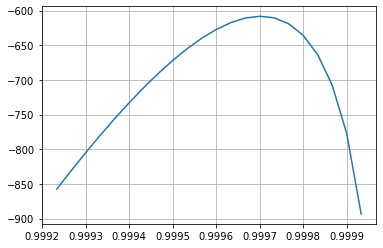

[3500.0, 3483.0, 3378.0, 3067.0, 2896.0, 2862.0, 2843.0]
[17.0, 105.0, 311.0, 171.0, 34.0, 19.0]
Outbreak # 2
q = 0.9996999499916652


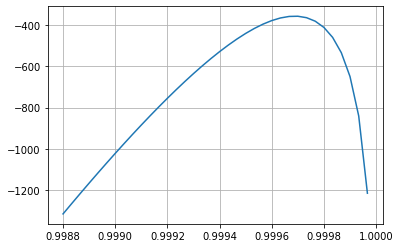

[3500.0, 3497.0, 3430.0, 3178.0, 3149.0, 3135.0, 3133.0]
[3.0, 67.0, 252.0, 29.0, 14.0, 2.0]
Outbreak # 3
q = 0.9996999499916652


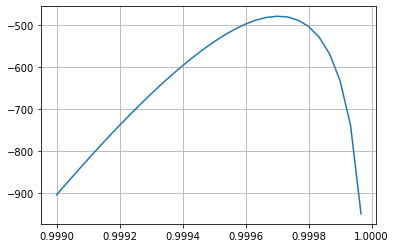

[3500.0, 3486.0, 3403.0, 3339.0, 3307.0, 3286.0, 3276.0]
[14.0, 83.0, 64.0, 32.0, 21.0, 10.0]
Outbreak # 4
q = 0.9996999499916652


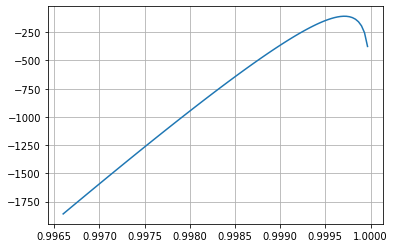

In [415]:
Q = graphLikelihood(outbreaks)

In [313]:
def reedFrostView(i, s, q, numRep, numGen):
    r = 0

    I = [[i] for x in range(numRep)]
    S = [[s] for x in range(numRep)]
    R = [[r] for x in range(numRep)]

    for y in range(numRep):
        for z in range(numGen):
            I[y].append(int(binom.rvs(S[y][-1],(1-q**(I[y][-1])), size=1)))
            S[y].append(S[y][-1]-I[y][-1])
            R[y].append(R[y][-1]+I[y][-2])

    return [I,S,R]

6.0 402 0.9966655551850617


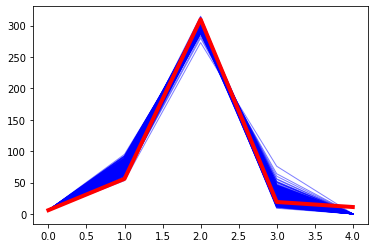

17.0 657 0.9972657552517505


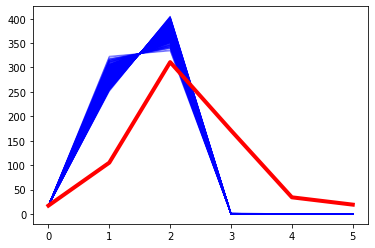

3.0 367 0.9958652884294765


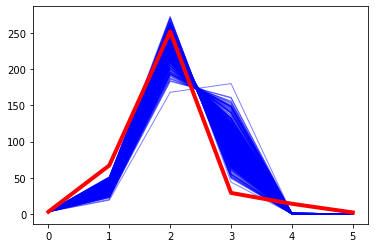

14.0 224 0.9920640213404468


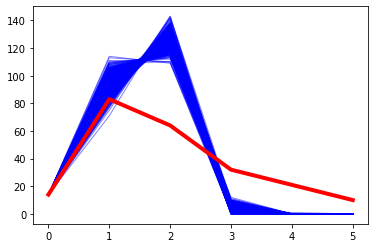

In [409]:
def compare(outbreaks,Q):
    numRep = 500
    for i in range(len(outbreaks)):
        data = outbreaks[i][1].tolist()
        print(data[0],int(sum(data)),Q[i])
        offset = -.03
        y = reedFrostView(int(data[0]),int(sum(data)), Q[i] + offset, numRep, len(data)-1)[0]
        x = [i for i in range(len(data))]
        for i in range(numRep):
            plt.plot(x,y[i], color="blue", alpha = .5, linewidth=1)

        plt.plot(data, linewidth=4, color='r')
        plt.show()

compare(outbreaks, Q)
